# Analysis of IMDB Data

# PART 1 - Installation and Initial Setup

In [1]:
%%info

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("numpy")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1670263798496_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

In [4]:
# The data comes from https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Actors

In [5]:
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

In [11]:
actors.createOrReplaceTempView('Actors')
sqldf = spark.sql(
" SELECT primaryName, birthYear, deathYear, knownForTitles FROM Actors"
).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

# Genres

In [12]:
genres.createOrReplaceTempView('Genres')
sqldf = spark.sql(
"SELECT titleType, primaryTitle, genres FROM Genres").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows

In [13]:
genres.createOrReplaceTempView('Genres')
sqldf = spark.sql(
"SELECT DISTINCT titleType FROM Genres").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

In [14]:
genres.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

# Movie Actors

In [15]:
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [16]:
movie_actors.createOrReplaceTempView('Movie_Actors')
sqldf = spark.sql(
"SELECT * FROM Movie_Actors").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

# Movie Ratings

In [18]:
movie_ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

In [17]:
movie_ratings.createOrReplaceTempView('Movie_Ratings')
sqldf = spark.sql(
"SELECT * FROM Movie_Ratings ORDER BY numVotes DESC").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt7430722|          6.8|    9999|
|tt4445154|          8.1|    9997|
|tt2229907|          6.3|    9996|
|tt0294097|          8.0|    9994|
|tt0264734|          6.5|    9993|
|tt8860450|          6.3|    9991|
|tt2032572|          5.2|    9991|
|tt2471626|          7.6|     999|
|tt3244036|          8.3|     999|
|tt2195566|          7.9|     999|
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data

In [20]:
print(f'Number of columns in Actors table: {len(actors.dtypes)}')
print(f'Number of rows in Actors table: {actors.count():,}')
print("\n")
print(f'Number of columns in Genres table: {len(genres.dtypes)}')
print(f'Number of rows in Genres table: {genres.count():,}')
print("\n")
print(f'Number of columns in Movie Actors table: {len(movie_actors.dtypes)}')
print(f'Number of rows in Movie Actors table: {movie_actors.count():,}')
print("\n")
print(f'Number of columns in Movie Ratings table: {len(movie_ratings.dtypes)}')
print(f'Number of rows in Movie Ratings table: {movie_ratings.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table: 6
Number of rows in Actors table: 9,706,922


Number of columns in Genres table: 9
Number of rows in Genres table: 6,321,302


Number of columns in Movie Actors table: 6
Number of rows in Movie Actors table: 36,468,817


Number of columns in Movie Ratings table: 3
Number of rows in Movie Ratings table: 993,153

# PART 2 - Analyzing Genres

In [21]:
genres.createOrReplaceTempView('Genres')
sqldf = spark.sql(
"SELECT tconst, titleType, genres FROM Genres").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

In [6]:
from pyspark.sql.functions import split, col, explode
genres.withColumn('genres',explode(split('genres',","))).createOrReplaceTempView('Genres')
sqldf = spark.sql(
"SELECT tconst, titleType, genres FROM Genres").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|     genres|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

In [156]:
genres.withColumn('genres',explode(split('genres',","))).createOrReplaceTempView('Genres')
sqldf = spark.sql(
"SELECT COUNT (distinct genres) FROM Genres").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+
|count(DISTINCT genres)|
+----------------------+
|                    29|
+----------------------+

In [78]:
genres.withColumn('genres',explode(split('genres',","))).createOrReplaceTempView('Genres')
sqldf = spark.sql(
"SELECT DISTINCT genres FROM Genres").show(30,truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genres     |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|\N         |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

**Oops! Something is off!**

In [108]:
genres.withColumn('genres',explode(split('genres',","))).createOrReplaceTempView('Genres')
sqldf = spark.sql(
'''SELECT DISTINCT genres FROM Genres WHERE genres != "\\\\N"''').show(30,truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genres     |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Short      |
|Film-Noir  |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

# Top Genres by Movies

In [121]:
genres.withColumn('genres',explode(split('genres',","))).createOrReplaceTempView('Genres')
movie_ratings.createOrReplaceTempView("Ratings")

sqldf = spark.sql(
    "SELECT g.genres, r.averageRating FROM Genres g INNER JOIN  Ratings r on g.tconst == r.tconst").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------+
|     genres|averageRating|
+-----------+-------------+
|Documentary|          5.1|
|      Short|          5.1|
|Documentary|          5.2|
|      Short|          5.2|
|     Comedy|          5.2|
|      Short|          5.2|
|     Comedy|          6.0|
|     Horror|          6.0|
|      Short|          6.0|
|Documentary|          4.9|
+-----------+-------------+
only showing top 10 rows

In [126]:
genres.withColumn('genres',explode(split('genres',","))).createOrReplaceTempView('Genres')
movie_ratings.createOrReplaceTempView("Ratings")

sqldf = spark.sql(
    '''SELECT g.genres, AVG(r.averageRating) AS avg_rating FROM Genres g 
    INNER JOIN  Ratings r on g.tconst == r.tconst 
    WHERE g.genres != "\\\\N" AND g.titleType = "movie" GROUP BY g.genres''').show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|     genres|        avg_rating|
+-----------+------------------+
|    Mystery|5.9404375359815775|
|    Musical|6.2032460545193695|
|     Action| 5.718734069668651|
|      Sport| 6.600145190562612|
|  Talk-Show|               5.8|
|    Romance|6.1257141803973605|
|   Thriller| 5.625967566447333|
| Reality-TV| 6.379310344827586|
|     Family| 6.250560452715203|
|    Fantasy| 5.924820762833382|
|    History| 6.822718115605144|
|  Animation| 6.326203750633555|
|  Film-Noir| 6.636246786632391|
|      Short| 7.260000000000001|
|     Sci-Fi| 5.325150008571917|
|       News| 7.200916030534349|
|      Drama| 6.288080210387902|
|Documentary| 7.245469798657718|
|    Western| 5.948970989337963|
|     Comedy| 5.941363108004128|
+-----------+------------------+
only showing top 20 rows

# Horizontal Bar Chart of Top Genres

In [127]:
genres.withColumn('genres',explode(split('genres',","))).createOrReplaceTempView('Genres')
movie_ratings.createOrReplaceTempView("Ratings")

sqldf = spark.sql(
    '''SELECT g.genres, AVG(r.averageRating) AS avg_rating FROM Genres g 
    INNER JOIN  Ratings r on g.tconst == r.tconst WHERE g.genres != "\\\\N" AND g.titleType = "movie"
    GROUP BY g.genres ORDER BY avg_rating DESC''').show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|     genres|        avg_rating|
+-----------+------------------+
|      Short|              7.26|
|Documentary| 7.245469798657716|
|       News|7.2009160305343505|
|  Biography| 6.983637640449438|
|  Game-Show|             6.975|
|    History| 6.822718115605146|
|      Music|6.7520202020202005|
|  Film-Noir| 6.636246786632389|
|      Sport| 6.600145190562614|
|        War| 6.483807030665668|
| Reality-TV| 6.379310344827587|
|  Animation| 6.326203750633552|
|      Drama| 6.288080210387902|
|     Family| 6.250560452715202|
|    Musical|6.2032460545193695|
|    Romance|6.1257141803973605|
|      Crime| 6.026013332684541|
|    Western| 5.948970989337962|
|     Comedy| 5.941363108004129|
|    Mystery|5.9404375359815775|
+-----------+------------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

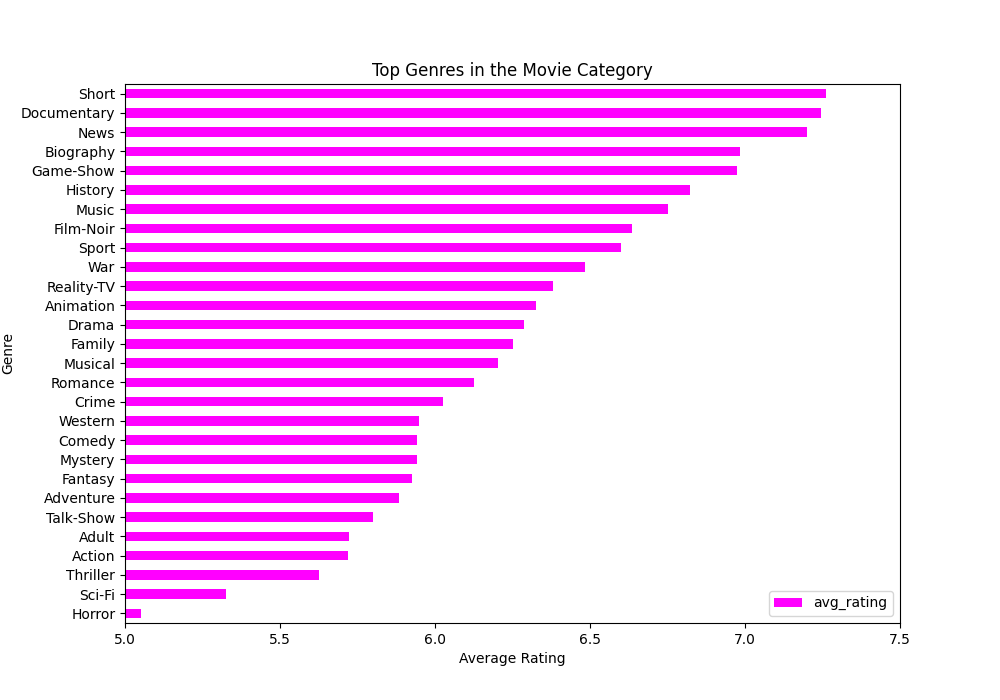

In [144]:
genres.withColumn('genres',explode(split('genres',","))).createOrReplaceTempView('Genres')
movie_ratings.createOrReplaceTempView("Ratings")

sqldf = spark.sql(
    '''SELECT g.genres, AVG(r.averageRating) AS avg_rating FROM Genres g 
    INNER JOIN  Ratings r on g.tconst == r.tconst WHERE g.genres != "\\\\N" AND g.titleType = "movie"
    GROUP BY g.genres ORDER BY avg_rating ASC''')
sqldf.toPandas().plot.barh("genres","avg_rating", color="magenta", figsize=(10,7))
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Top Genres in the Movie Category")
plt.xlim(5, 7.5)
%matplot plt

# PART 3 - Analyzing Job Categories

In [161]:
movie_actors.withColumn('category',explode(split('category',","))).createOrReplaceTempView('Actors')
sqldf = spark.sql(
"SELECT DISTINCT tconst, category FROM Actors ORDER BY tconst ASC").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|       director|
|tt0000001|           self|
|tt0000001|cinematographer|
|tt0000002|       composer|
|tt0000002|       director|
+---------+---------------+
only showing top 5 rows

In [168]:
movie_actors.withColumn('category',explode(split('category',","))).createOrReplaceTempView('Actors')
sqldf = spark.sql(
"SELECT COUNT (DISTINCT category) FROM Actors").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------+
|count(DISTINCT category)|
+------------------------+
|                      12|
+------------------------+

In [169]:
movie_actors.withColumn('category',explode(split('category',","))).createOrReplaceTempView('Actors')
sqldf = spark.sql(
"SELECT DISTINCT category FROM Actors").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

## Top Job Categories

In [172]:
movie_actors.withColumn('category',explode(split('category',","))).createOrReplaceTempView('Actors')
sqldf = spark.sql(
"SELECT category, COUNT (category) as count FROM Actors GROUP BY category").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

In [173]:
movie_actors.withColumn('category',explode(split('category',","))).createOrReplaceTempView('Actors')
sqldf = spark.sql(
"SELECT category, COUNT (category) as count FROM Actors GROUP BY category ORDER BY count DESC").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

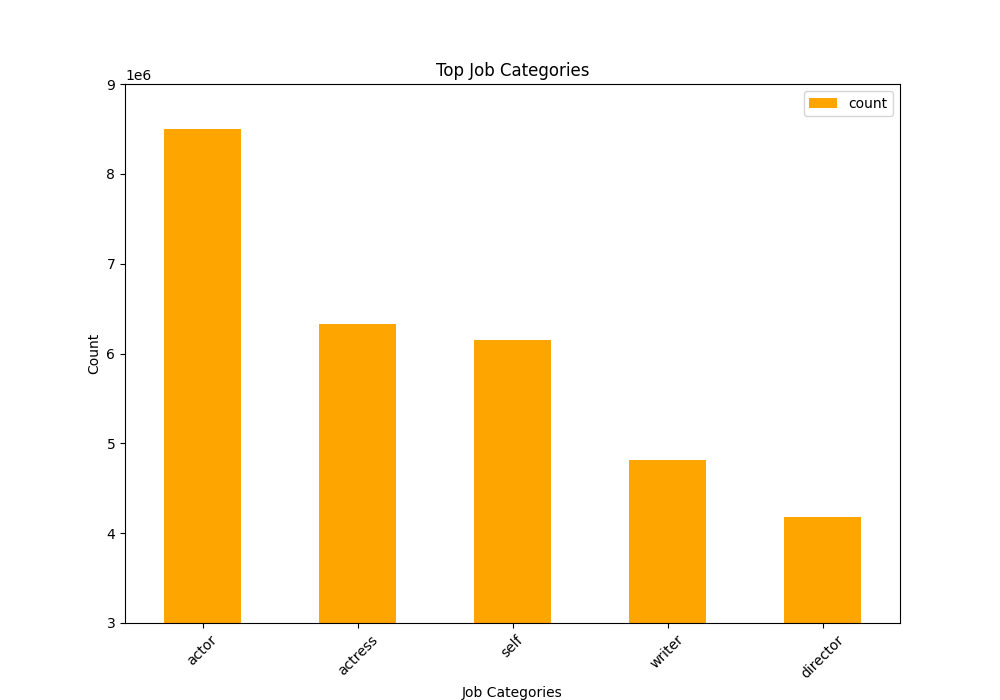

In [125]:
movie_actors.withColumn('category',explode(split('category',","))).createOrReplaceTempView('Actors')
sqldf = spark.sql(
"SELECT category, COUNT (category) as count FROM Actors GROUP BY category ORDER BY count DESC LIMIT 5")
sqldf.toPandas().plot.bar("category","count", color ='orange', figsize = (10,7))
plt.xlabel("Job Categories")
plt.ylabel("Count")
plt.ylim(3000000, 9000000)
plt.xticks(rotation = 45)
plt.title("Top Job Categories")
%matplot plt

# PART 4 - Answer to the following questions:

# 1) Find all the "movies" "acted" by both "Johnny Depp" and "Helena Bonham Carter".

In [6]:
genres.createOrReplaceTempView('Genres')
actors.createOrReplaceTempView('Actor')
movie_actors.createOrReplaceTempView("Movie_Actor")

sqldf = spark.sql(
    '''SELECT DISTINCT g.primaryTitle FROM Genres g 
    JOIN  Movie_Actor m on g.tconst == m.tconst
    FULL JOIN  Actor a on m.nconst == a.nconst
    WHERE g.titleType = "movie" AND a.primaryName IN ("Johnny Depp", "Helena Bonham Carter" )
    GROUP BY g.primaryTitle 
    HAVING COUNT(*) = 2
    ''').show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|        primaryTitle|
+--------------------+
|        Corpse Bride|
|        Dark Shadows|
|Charlie and the C...|
|Alice Through the...|
|Sweeney Todd: The...|
| Alice in Wonderland|
+--------------------+

# 2) Find all the "movies" "acted" by "Brad Pitt" after 2010.

In [89]:
genres.createOrReplaceTempView('Genres')
actors.createOrReplaceTempView('Actor')
movie_actors.createOrReplaceTempView("Movie_Actor")

sqldf = spark.sql(
    '''SELECT DISTINCT g.primaryTitle, g.startYear FROM Genres g 
    JOIN  Movie_Actor m on g.tconst == m.tconst
    JOIN  Actor a on a.nconst == m.nconst
    WHERE a.primaryName == "Brad Pitt" AND g.startYear > 2010 AND m.category = "actor" and g.titleType = "movie"
    ORDER BY g.startYear DESC
    ''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+
|        primaryTitle|startYear|
+--------------------+---------+
|             Babylon|     2021|
|            Ad Astra|     2019|
|Once Upon a Time ...|     2019|
|         War Machine|     2017|
|              Allied|     2016|
|       The Big Short|     2015|
|          By the Sea|     2015|
|                Fury|     2014|
|    12 Years a Slave|     2013|
|         World War Z|     2013|
| Killing Them Softly|     2012|
|           Moneyball|     2011|
|    The Tree of Life|     2011|
+--------------------+---------+

# 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [50]:
genres.createOrReplaceTempView('Genres')
actors.createOrReplaceTempView('Actor')
movie_actors.createOrReplaceTempView("Movie_Actor")

sqldf = spark.sql(
    '''SELECT g.startYear, COUNT (DISTINCT g.primaryTitle) as count FROM Genres g 
    JOIN  Movie_Actor m on g.tconst == m.tconst
    JOIN  Actor a on a.nconst == m.nconst
    WHERE a.primaryName == "Zendaya" AND g.titleType == "movie" AND g.startYear != "\\\\N"
    GROUP BY g.startYear
    ''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|     2020|    1|
|     2018|    2|
|     2017|    1|
+---------+-----+

# 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

In [57]:
genres.createOrReplaceTempView('Genres')
movie_ratings.createOrReplaceTempView("Ratings")

sqldf = spark.sql(
    '''SELECT g.primaryTitle, r.averageRating FROM Genres g 
    INNER JOIN  Ratings r on g.tconst == r.tconst
    WHERE g.startYear = 2019 AND r.averageRating > 9.7 AND g.titleType == "movie" 
    ORDER BY r.averageRating 
    ''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|        primaryTitle|averageRating|
+--------------------+-------------+
|      A Grunt's Life|         10.0|
|              Kirket|         10.0|
|Bu Can Var Oldugu...|         10.0|
|   L'Enfant Terrible|         10.0|
| The Butcher Baronet|         10.0|
|A Medicine for th...|         10.0|
|   Our Scripted Life|         10.0|
|The Twilight Zone...|         10.0|
|    Love in Kilnerry|         10.0|
|            Randhawa|          9.8|
|We Shall Not Die Now|          9.8|
|     Time and motion|          9.8|
|Kamen Rider Zi-O:...|          9.8|
|   Gini Helida Kathe|          9.8|
|          Square One|          9.8|
|   From Shock to Awe|          9.8|
|         Superhombre|          9.9|
|        The Cardinal|          9.9|
|Puritan: All of L...|          9.9|
+--------------------+-------------+

# Extra Credit - Analysis of your choice (2 pts)

Try and analyze some interesting dimension to this data. You should specify the name of the analysis in your Project2_Analysis.ipynb. This part similar to Part 2 and Part 3.

•	You must create at least one visual.

# 5) What is the average runtime of movies per year with a rating greater than 9.5 released after "2010"?

In [154]:
genres.createOrReplaceTempView('Genres')
movie_ratings.createOrReplaceTempView("Ratings")

sqldf = spark.sql(
    '''SELECT g.startYear, AVG(g.runtimeMinutes) AS avg_runtime FROM Genres g 
    INNER JOIN  Ratings r on g.tconst == r.tconst 
    WHERE g.startYear > 2010 AND r.averageRating > 9.5 AND g.titleType == "movie"
    GROUP BY g.startYear ORDER BY g.startYear DESC''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+
|startYear|       avg_runtime|
+---------+------------------+
|     2019|102.71428571428571|
|     2018|              87.0|
|     2017|             84.75|
|     2016|              77.2|
|     2015|              71.5|
|     2014|              63.0|
|     2013|              62.0|
|     2012|              83.5|
+---------+------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

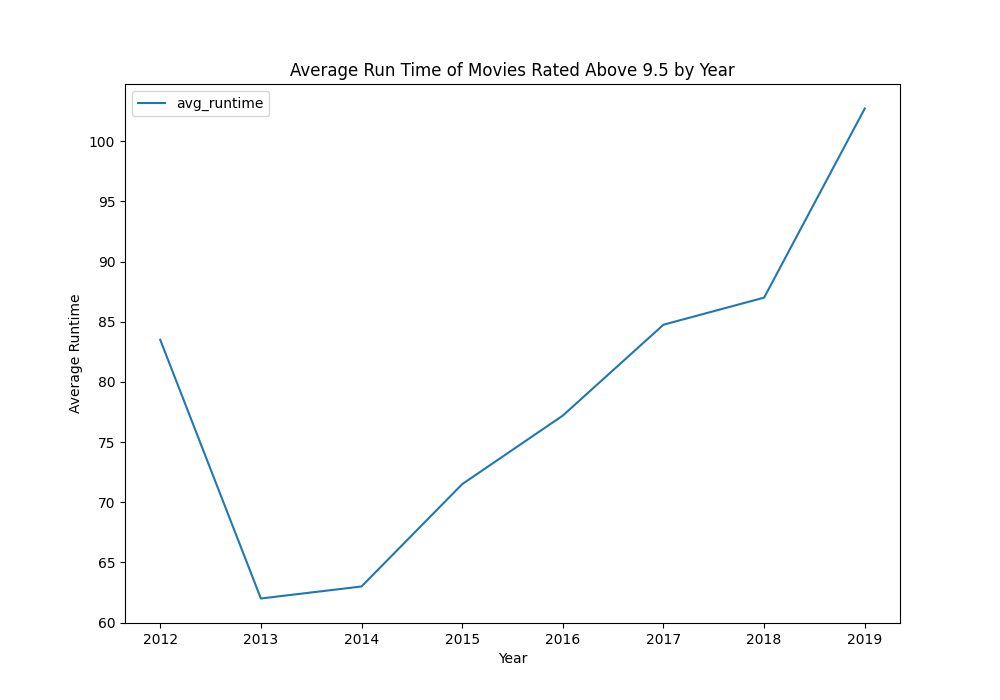

In [155]:
genres.createOrReplaceTempView('Genres')
movie_ratings.createOrReplaceTempView("Ratings")

sqldf = spark.sql(
    '''SELECT g.startYear, AVG(g.runtimeMinutes) AS avg_runtime FROM Genres g 
    INNER JOIN  Ratings r on g.tconst == r.tconst 
    WHERE g.startYear > 2010 AND r.averageRating > 9.5 AND g.titleType == "movie"
    GROUP BY g.startYear ORDER BY g.startYear ASC''')
sqldf.toPandas().plot.line("startYear", "avg_runtime", figsize = (10,7))
plt.xlabel("Year")
plt.ylabel("Average Runtime")
plt.title("Average Run Time of Movies Rated Above 9.5 by Year")
%matplot plt


# Extra Credit - Answering a question of your choice (2 pts)

Come up an answer to a question like in Part 4. The question of your choice should not be similar to the ones given in Part 4. Try to find an interesting question using different columns (i.e. num_votes, runtime). You should specify the question in Project2_Analysis.ipynb. 

•	You must join at least two datasets.

# 6) What is the runtime of movies with a "10.0" rating released in "2019"?

In [69]:
genres.createOrReplaceTempView('Genres')
movie_ratings.createOrReplaceTempView("Ratings")

sqldf = spark.sql(
    '''SELECT DISTINCT g.primaryTitle, r.averageRating, g.runtimeMinutes FROM Genres g 
    JOIN  Ratings r on g.tconst == r.tconst 
    WHERE g.startYear = 2019 AND r.averageRating = 10 AND g.titleType == "movie" AND g.runtimeMinutes != "\\\\N"
    ''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+--------------+
|        primaryTitle|averageRating|runtimeMinutes|
+--------------------+-------------+--------------+
|Bu Can Var Oldugu...|         10.0|            87|
|A Medicine for th...|         10.0|            15|
|   L'Enfant Terrible|         10.0|           126|
|    Love in Kilnerry|         10.0|           100|
|The Twilight Zone...|         10.0|           180|
|      A Grunt's Life|         10.0|           116|
|              Kirket|         10.0|           132|
+--------------------+-------------+--------------+